# Исследование объявлений о продаже квартир

Данные для изучения - данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Цель -  научиться определять рыночную стоимость объектов недвижимости. Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

### Изучение данных

In [1]:
import pandas as pd

In [2]:
#считываем данные из файла csv в датафрейм и сохраняем их в переменной data
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
#выведем первые 5 строк датафрейма
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


***Общая информация о датафрейме***

In [4]:
data.shape

(23699, 22)

In [5]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


***Общая гистограмма для всех числовых столбцов таблицы***

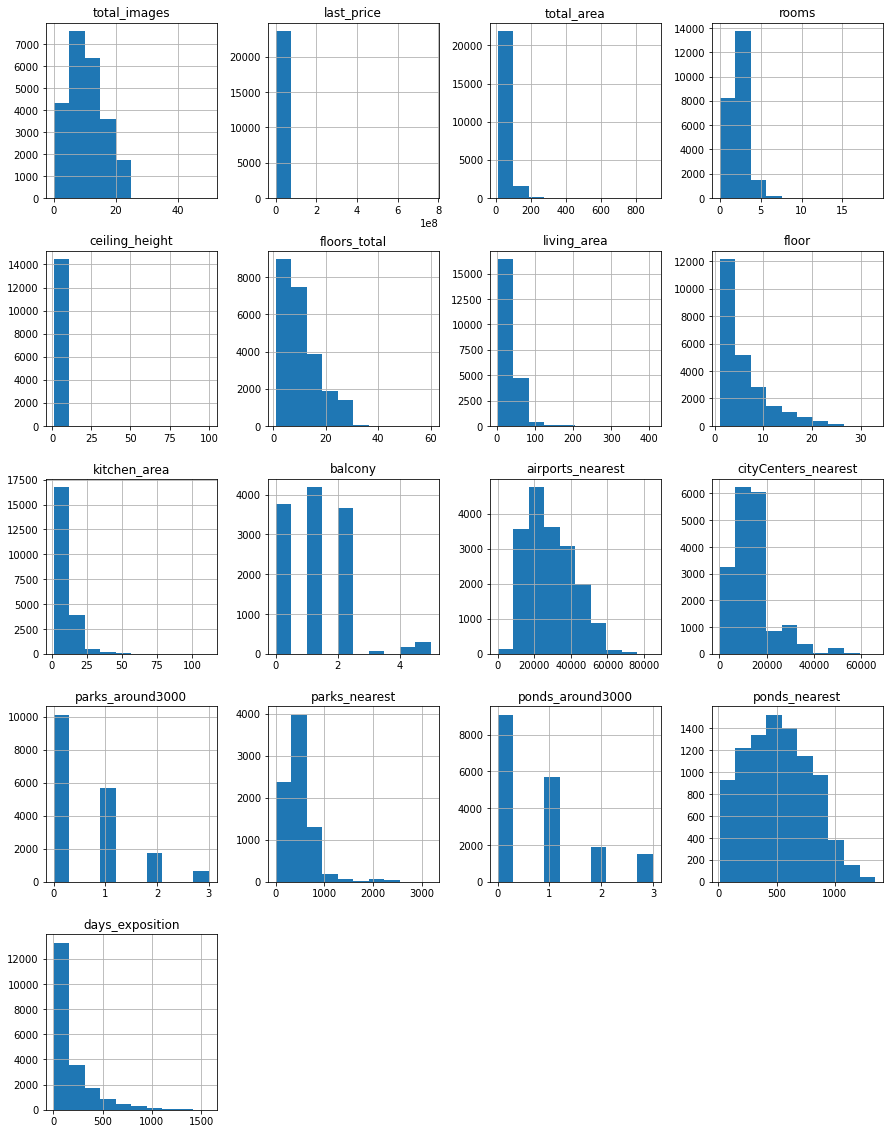

In [8]:
data.hist(figsize=(15, 20));

***Распределение непрерынвых данных похоже на распределение Пуассона***

### Предобработка данных

***Замена пропусков***

In [9]:
#выведем количество пропущенных значений для каждого столбца 
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [10]:
#посмотрим уникальные значения столбца
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [11]:
data.groupby('is_apartment')['total_images'].count()

is_apartment
False    2725
True       50
Name: total_images, dtype: int64

Скорее всего, если есть пропуск в таких значениях, то квартира не явялется апартаментами

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [13]:
data['is_apartment'].isna().sum()

0

В столбце не осталось пропусков

In [14]:
data['balcony'].unique()

array([nan,  2.,  0.,  1.,  5.,  4.,  3.])

Если продавец не указал число балконов, то, скорее всего, в его квартире их нет, заменим пропуски нулями

In [15]:
data['balcony'] = data['balcony'].fillna(0)

In [16]:
data['balcony'].unique()

array([0., 2., 1., 5., 4., 3.])

In [17]:
data['balcony'].isna().sum()

0

В данном столбце не осталось пропусков

Посмотрим на распределение высоты потолков в зависимости от типа квартиры:
1. Студия: мы видим, значения не сильно отличаются, значит, можно не разделять их при заполнении пропусков

In [18]:
print(f'Среднее \n {data.groupby("studio")["ceiling_height"].mean()}')
print('\n')
print(f'Медиана \n {data.groupby("studio")["ceiling_height"].median()}')

Среднее 
 studio
False    2.771345
True     2.800390
Name: ceiling_height, dtype: float64


Медиана 
 studio
False    2.65
True     2.70
Name: ceiling_height, dtype: float64


2. Апартаменты: здесь мы уже можем заметить, что среднее значение высоты потолков в апартаментах значительно выше, чем в обычных квартирах

In [19]:
print(f'Среднее \n {data.groupby("is_apartment")["ceiling_height"].mean()}')
print('\n')
print(f'Медиана \n {data.groupby("is_apartment")["ceiling_height"].median()}')

Среднее 
 is_apartment
False    2.760720
True     6.313864
Name: ceiling_height, dtype: float64


Медиана 
 is_apartment
False    2.65
True     3.00
Name: ceiling_height, dtype: float64


Замени пропуски средним значением отдельно для апартаментов и обычных квартир

In [20]:
for i in data['is_apartment'].unique():   
    data.loc[(data['is_apartment'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['is_apartment'] == i), 'ceiling_height'].mean()

In [21]:
data['is_apartment'].unique()

array([False,  True])

In [22]:
data['ceiling_height'].isna().sum()

0

В столбце не осталось пропусков

In [23]:
#найдем среднее отношение площади кухни к общей площади квартиры из тех данных, где нет пропусков
data['av_kitchen_area'] = data['kitchen_area'] / data['total_area']

In [24]:
#заменим пропуски в данных следующим значением: среднее отношение * общая площадь квартиры
data['kitchen_area'] = data['kitchen_area'].fillna(data['av_kitchen_area'].mean() * data['total_area'])

In [25]:
data['kitchen_area'].isna().sum()

0

Теперь в данной колонке нет пропусков

In [26]:
data['living_area'].unique()

array([51.  , 18.6 , 34.3 , ..., 31.65, 13.59, 42.55])

In [27]:
#найдем среднее отношение жилой площади к общей площади квартиры из тех данных, где нет пропусков
data['av_living_area'] = data['living_area'] / data['total_area']

In [28]:
#заменим пропуски в данных следующим значением: среднее отношение * общая площадь квартиры
data['living_area'] = data['living_area'].fillna(data['av_living_area'].mean() * data['total_area'])

In [29]:
data['living_area'].isna().sum()

0

Теперь в данной колонке нет пропусков

***Выводы:***
- В картографических данных логичную замену предложить невозможно, поэтому пропуски там остались
- В добавленных пользователем данных пропуски были заменены на определенные значения. К примеру, пропуски в количестве балконов на 0, а пропуски в высоте потолка на среднее значение в зависимости от типа квартиры (апартаменты или нет) 

***Изменение типов данных***

In [30]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,av_kitchen_area,av_living_area
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70000,16.0,51.000000,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.231481,0.472222
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.76072,11.0,18.600000,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.272277,0.460396
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.76072,5.0,34.300000,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.148214,0.612500
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.76072,14.0,89.797718,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03000,14.0,32.000000,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.410000,0.320000
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.76072,12.0,14.400000,5,False,...,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,0.299342,0.473684
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.76072,26.0,10.600000,6,False,...,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.386059,0.284182
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.76072,24.0,40.437211,22,False,...,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,0.263966,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.76072,27.0,15.430000,26,False,...,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,0.265682,0.465320
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50000,9.0,43.600000,7,False,...,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,0.106557,0.714754


In [31]:
data.dtypes

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
av_kitchen_area         float64
av_living_area          float64
dtype: object

Явно видно, что в столбце first_day_exposition находится дата, заменим тип данного столбца

In [32]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%dT%H:%M:%S')

Заменим столбцы с явно целочисленными значениями с float на int

In [33]:
#изменение типа данных в столбцах floors_total, airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000
data[['floors_total', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000']] = \
data[['floors_total', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000']]\
.astype('Int64')

#изменение типа данных в столбце balcony
data['balcony'] = data['balcony'].astype('int')

In [34]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,av_kitchen_area,av_living_area
0,20,13000000.0,108.00,2019-03-07,3,2.70000,16,51.000000,8,False,...,Санкт-Петербург,18863,16028,1,482.0,2,755.0,NaN,0.231481,0.472222
1,7,3350000.0,40.40,2018-12-04,1,2.76072,11,18.600000,1,False,...,посёлок Шушары,12817,18603,0,NaN,0,NaN,81.0,0.272277,0.460396
2,10,5196000.0,56.00,2015-08-20,2,2.76072,5,34.300000,4,False,...,Санкт-Петербург,21741,13933,1,90.0,2,574.0,558.0,0.148214,0.612500
3,0,64900000.0,159.00,2015-07-24,3,2.76072,14,89.797718,9,False,...,Санкт-Петербург,28098,6800,2,84.0,3,234.0,424.0,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03000,14,32.000000,13,False,...,Санкт-Петербург,31856,8098,2,112.0,1,48.0,121.0,0.410000,0.320000
5,10,2890000.0,30.40,2018-09-10,1,2.76072,12,14.400000,5,False,...,городской посёлок Янино-1,<NA>,<NA>,<NA>,NaN,<NA>,NaN,55.0,0.299342,0.473684
6,6,3700000.0,37.30,2017-11-02,1,2.76072,26,10.600000,6,False,...,посёлок Парголово,52996,19143,0,NaN,0,NaN,155.0,0.386059,0.284182
7,5,7915000.0,71.60,2019-04-18,2,2.76072,24,40.437211,22,False,...,Санкт-Петербург,23982,11634,0,NaN,0,NaN,NaN,0.263966,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.76072,27,15.430000,26,False,...,посёлок Мурино,<NA>,<NA>,<NA>,NaN,<NA>,NaN,189.0,0.265682,0.465320
9,18,5400000.0,61.00,2017-02-26,3,2.50000,9,43.600000,7,False,...,Санкт-Петербург,50898,15008,0,NaN,0,NaN,289.0,0.106557,0.714754


In [35]:
data.dtypes

total_images                     int64
last_price                     float64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     Int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                          int64
locality_name                   object
airports_nearest                 Int64
cityCenters_nearest              Int64
parks_around3000                 Int64
parks_nearest                  float64
ponds_around3000                 Int64
ponds_nearest                  float64
days_exposition                float64
av_kitchen_area                float64
av_living_area                 float64
dtype: object

***Устранение неявных дубликатов***

In [36]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [37]:
len(data['locality_name'].sort_values().unique())

365

In [38]:
#заменим ё на е в значениях
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

In [39]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

In [40]:
data['locality_name'] = data['locality_name'].\
replace('деревня|коттеджный поселок|поселок городского типа|городской поселок|село|поселок|садоводческое некоммерческое товарищество|садовое товарищество', '', regex=True)

In [41]:
#удалим пробелы из значений
data['locality_name'] = data['locality_name'].str.strip()

print(data['locality_name'].sort_values().unique())

['Агалатово' 'Александровская' 'Алексеевка' 'Аннино' 'Аро' 'Барышево'
 'Батово' 'Бегуницы' 'Белогорка' 'Белоостров' 'Бокситогорск'
 'Большая Вруда' 'Большая Ижора' 'Большая Пустомержа' 'Большие Колпаны'
 'Большое Рейзино' 'Большой Сабск' 'Бор' 'Борисова Грива' 'Бугры'
 'Будогощь' 'Ваганово' 'Важины' 'Вартемяги' 'Вахнова Кара' 'Виллози'
 'Вознесенье' 'Возрождение' 'Войсковицы' 'Войскорово' 'Володарское'
 'Волосово' 'Волхов' 'Всеволожск' 'Выборг' 'Вырица' 'Выскатка'
 'Высокоключевой' 'Высоцк' 'Гаврилово' 'Гарболово' 'Гатчина' 'Гладкое'
 'Глажево' 'Глебычево' 'Глинка' 'Гончарово' 'Горбунки' 'Гостилицы'
 'Громово' 'Дзержинского' 'Дружная Горка' 'Дружноселье' 'Дубровка'
 'Елизаветино' 'Ефимовский' 'Жил' 'Жилгородок' 'Житково' 'Заводской'
 'Заклинье' 'Заневка' 'Запорожское' 'Зеленогорск' 'Зимитицы' 'Ивангород'
 'Извара' 'Ильичево' 'Иссад' 'Калитино' 'Каложицы' 'Кальтино'
 'Каменногорск' 'Камышовка' 'Каськово' 'Келози' 'Кивеннапа Север'
 'Кикерино' 'Кингисепп' 'Кингисеппский' 'Кипень' 'Кириши

In [42]:
len(data['locality_name'].sort_values().unique())

309

In [43]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,av_kitchen_area,av_living_area
0,20,13000000.0,108.0,2019-03-07,3,2.70000,16,51.000000,8,False,...,Санкт-Петербург,18863,16028,1,482.0,2,755.0,NaN,0.231481,0.472222
1,7,3350000.0,40.4,2018-12-04,1,2.76072,11,18.600000,1,False,...,Шушары,12817,18603,0,NaN,0,NaN,81.0,0.272277,0.460396
2,10,5196000.0,56.0,2015-08-20,2,2.76072,5,34.300000,4,False,...,Санкт-Петербург,21741,13933,1,90.0,2,574.0,558.0,0.148214,0.612500
3,0,64900000.0,159.0,2015-07-24,3,2.76072,14,89.797718,9,False,...,Санкт-Петербург,28098,6800,2,84.0,3,234.0,424.0,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03000,14,32.000000,13,False,...,Санкт-Петербург,31856,8098,2,112.0,1,48.0,121.0,0.410000,0.320000


***Обработка аномальных значений***

In [44]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,av_kitchen_area,av_living_area
count,23699.000000,2.369900e+04,23699.000000,23699.000000,23699.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000,21421.000000,21796.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.768216,10.673824,34.562480,5.892358,10.572683,0.591080,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634,0.187355,0.564766
std,5.682529,1.088701e+07,35.654083,1.078405,0.988150,6.597173,22.326965,4.885249,6.095394,0.959298,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988,0.072968,0.105368
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,0.025381,0.021583
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000,0.133333,0.495177
50%,9.000000,4.650000e+06,52.000000,2.000000,2.760720,9.000000,30.000000,4.000000,9.080000,0.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000,0.172414,0.567860
75%,14.000000,6.800000e+06,69.900000,3.000000,2.760720,16.000000,42.100000,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000,0.232416,0.637880
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,0.787879,1.000000


Посмотрим аномальные значения на графиках

In [45]:
import matplotlib.pyplot as plt 

In [46]:
data.isna().sum().sort_values(ascending=False)

parks_nearest           15620
ponds_nearest           14589
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
av_kitchen_area          2278
av_living_area           1903
floors_total               86
locality_name              49
balcony                     0
total_images                0
last_price                  0
open_plan                   0
studio                      0
is_apartment                0
floor                       0
living_area                 0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
kitchen_area                0
dtype: int64

In [47]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

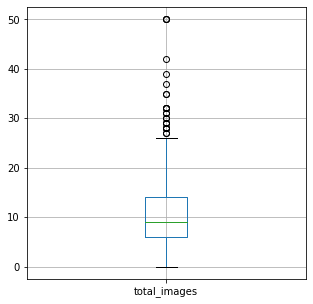

In [48]:
data.boxplot(column='total_images', figsize=(5,5))
plt.show()

In [49]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

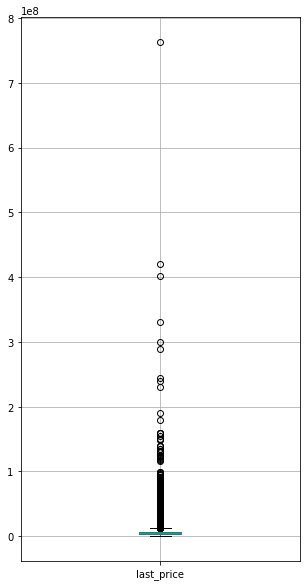

In [50]:
data.boxplot(column='last_price', figsize=(5,10))
plt.show()

In [51]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

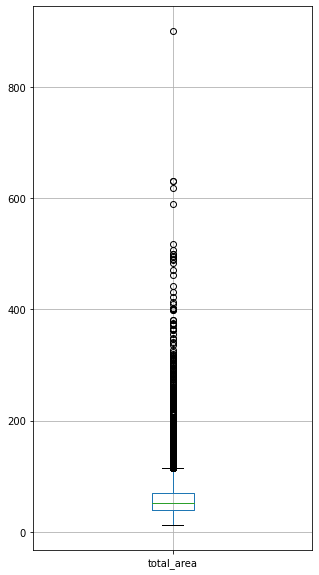

In [52]:
data.boxplot(column='total_area', figsize=(5,10))
plt.show()

In [53]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

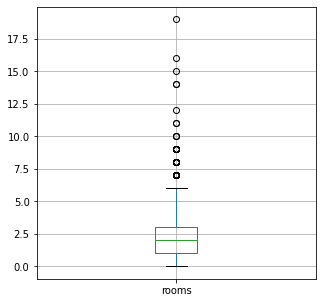

In [54]:
data.boxplot(column='rooms', figsize=(5,5))
plt.show()

In [55]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.768216
std          0.988150
min          1.000000
25%          2.600000
50%          2.760720
75%          2.760720
max        100.000000
Name: ceiling_height, dtype: float64

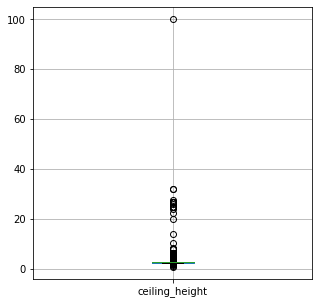

In [56]:
data.boxplot(column='ceiling_height', figsize=(5,5))
plt.show()

In [57]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

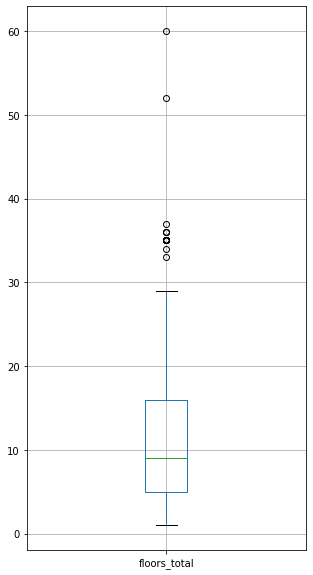

In [58]:
data.boxplot(column='floors_total', figsize=(5,10))
plt.show()

In [59]:
data['living_area'].describe()

count    23699.000000
mean        34.562480
std         22.326965
min          2.000000
25%         19.000000
50%         30.000000
75%         42.100000
max        409.700000
Name: living_area, dtype: float64

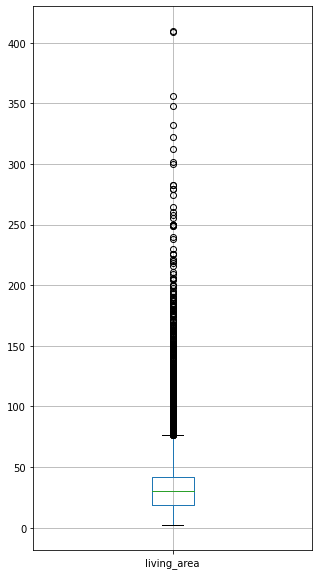

In [60]:
data.boxplot(column='living_area', figsize=(5,10))
plt.show()

In [61]:
data['floor'].describe()

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

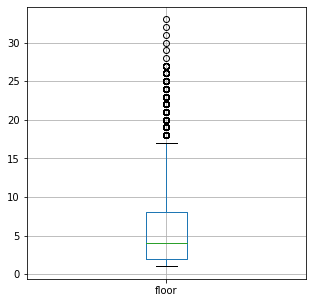

In [62]:
data.boxplot(column='floor', figsize=(5,5))
plt.show()

In [63]:
data['kitchen_area'].describe()

count    23699.000000
mean        10.572683
std          6.095394
min          1.300000
25%          7.000000
50%          9.080000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

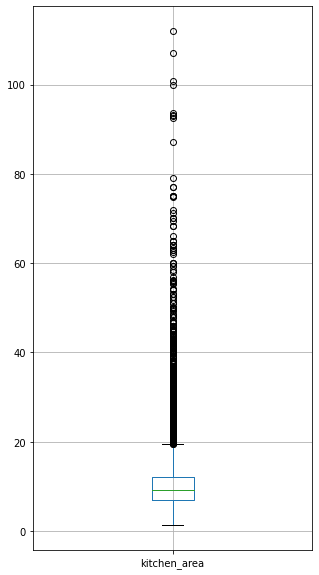

In [64]:
data.boxplot(column='kitchen_area', figsize=(5,10))
plt.show()

In [65]:
data['ceiling_height'].describe()

count    23699.000000
mean         2.768216
std          0.988150
min          1.000000
25%          2.600000
50%          2.760720
75%          2.760720
max        100.000000
Name: ceiling_height, dtype: float64

Кажется, некоторые данные о высоте потолков были увеличены в 10 раз

In [66]:
#разделим высоту потолков выше 10 на 10
data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data.loc[data['ceiling_height'] > 10, 'ceiling_height'] / 10

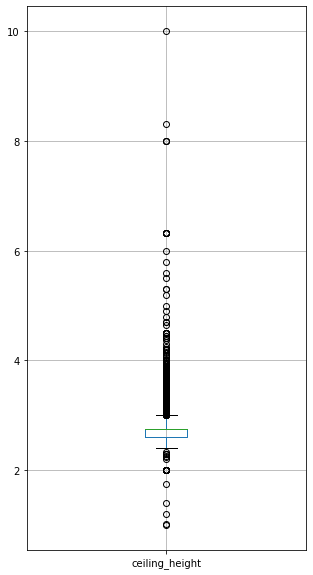

In [67]:
data.boxplot(column='ceiling_height', figsize=(5,10))
plt.show()

Если посмотреть на кажущиеся аномальными значения количества комнат и площадей, то аномалия остается неясной, и эти значения следует отбросить

In [68]:
data.loc[(data['rooms'] > 7) & (data['living_area'] > 150) & (data['total_area'] > 200)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,av_kitchen_area,av_living_area
813,7,16500000.0,229.0,2016-02-25,8,2.76072,6,160.0,5,False,...,Санкт-Петербург,23968,4536,1,243.0,0,NaN,806.0,0.109170,0.698690
866,5,25000000.0,363.0,2017-12-23,14,3.16000,5,222.0,4,False,...,Санкт-Петербург,38076,7950,0,NaN,2,435.0,418.0,0.045730,0.611570
5358,20,65000000.0,590.0,2019-02-14,15,3.50000,6,409.0,3,False,...,Санкт-Петербург,24447,4666,1,767.0,0,NaN,14.0,0.169492,0.693220
7857,11,150000000.0,230.0,2017-10-25,8,2.76072,8,220.0,8,False,...,Санкт-Петербург,25525,5845,2,116.0,0,NaN,135.0,NaN,0.956522
8822,14,49968900.0,398.0,2017-07-12,9,3.00000,2,160.1,1,False,...,Санкт-Петербург,17720,16722,3,471.0,2,440.0,471.0,0.103015,0.402261
9550,10,23500000.0,313.0,2017-02-13,9,3.20000,6,179.2,5,False,...,Санкт-Петербург,38435,10138,1,146.0,0,NaN,NaN,0.042173,0.572524
10569,13,36900000.0,347.5,2017-09-14,8,2.76072,4,160.0,1,False,...,Колпино,28346,34132,1,1809.0,2,241.0,249.0,0.115108,0.460432
11436,4,24000000.0,316.3,2015-03-25,8,2.76072,5,187.0,5,False,...,Санкт-Петербург,24555,5129,0,NaN,1,934.0,542.0,NaN,0.591211
13019,0,22250000.0,249.9,2019-04-23,9,3.20000,5,157.0,5,False,...,Санкт-Петербург,10328,9987,2,352.0,0,NaN,NaN,0.049620,0.628251
13397,14,19500000.0,309.7,2016-02-03,9,2.76072,5,199.0,5,False,...,Санкт-Петербург,10328,9987,2,352.0,0,NaN,468.0,0.046174,0.642557


In [69]:
data = data[(data['total_images'] < 25) & (data['ceiling_height'] < 3) & (data['ceiling_height'] > 2.4) \
            & (data['rooms'] < 6) & (data['total_area'] < 100) &(data['floors_total'] < 30) & \
            (data['living_area'] < 75) & (data['kitchen_area'] < 20) & (data['floor'] < 17)]

***Выводы:***
1. Был изменени тип данных столбца с датой и столбцов с явным типом данных - целое число
2. В столбце locality_name были удалены неявные дубликаты
3. Были выявлены и обработаны аномалии, где понятна их природа, в других случаях были отброшены аномальные значения

### Добавление новых признаков

In [70]:
#цена одного квадратного метра
data['price_per_sq_m'] = data['last_price'] / data['total_area']

In [71]:
#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
data['first_week_day_exposition'] = data['first_day_exposition'].dt.weekday

In [72]:
#месяц публикации объявления
data['month_of_exposition'] = data['first_day_exposition'].dt.month

In [73]:
#год публикации объявления
data['year_of_exposition'] = data['first_day_exposition'].dt.year

In [74]:
#тип этажа квартиры (значения — «первый», «последний», «другой»)
def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['type_of_floor'] = data.apply(type_of_floor, axis=1)

In [75]:
#расстояние до центра города в километрах
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).astype('float').round()

In [76]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,av_kitchen_area,av_living_area,price_per_sq_m,first_week_day_exposition,month_of_exposition,year_of_exposition,type_of_floor,cityCenters_nearest_km
1,7,3350000.0,40.4,2018-12-04,1,2.76072,11,18.6,1,False,...,NaN,81.0,0.272277,0.460396,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.76072,5,34.3,4,False,...,574.0,558.0,0.148214,0.612500,92785.714286,3,8,2015,другой,14.0
5,10,2890000.0,30.4,2018-09-10,1,2.76072,12,14.4,5,False,...,NaN,55.0,0.299342,0.473684,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.3,2017-11-02,1,2.76072,26,10.6,6,False,...,NaN,155.0,0.386059,0.284182,99195.710456,3,11,2017,другой,19.0
9,18,5400000.0,61.0,2017-02-26,3,2.50000,9,43.6,7,False,...,NaN,289.0,0.106557,0.714754,88524.590164,6,2,2017,другой,15.0
10,5,5050000.0,39.6,2017-11-16,1,2.67000,12,20.3,3,False,...,553.0,137.0,0.214646,0.512626,127525.252525,3,11,2017,другой,14.0
11,9,3300000.0,44.0,2018-08-27,2,2.76072,5,31.0,4,False,...,NaN,7.0,0.136364,0.704545,75000.000000,0,8,2018,другой,52.0
12,10,3890000.0,54.0,2016-06-30,2,2.76072,5,30.0,5,False,...,NaN,90.0,0.166667,0.555556,72037.037037,3,6,2016,последний,NaN
13,20,3550000.0,42.8,2017-07-01,2,2.56000,5,27.0,5,False,...,298.0,366.0,0.121495,0.630841,82943.925234,5,7,2017,последний,33.0
14,1,4400000.0,36.0,2016-06-23,1,2.76072,6,17.0,1,False,...,96.0,203.0,0.222222,0.472222,122222.222222,3,6,2016,первый,31.0


### Исследовательский анализ данных

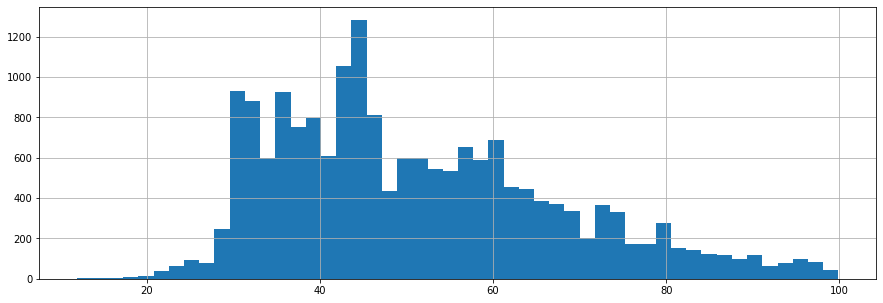

In [77]:
data['total_area'].hist(bins=50, figsize=(15,5));

***На графике видно, что больше всего квартир с площадью - около 45 кв м***

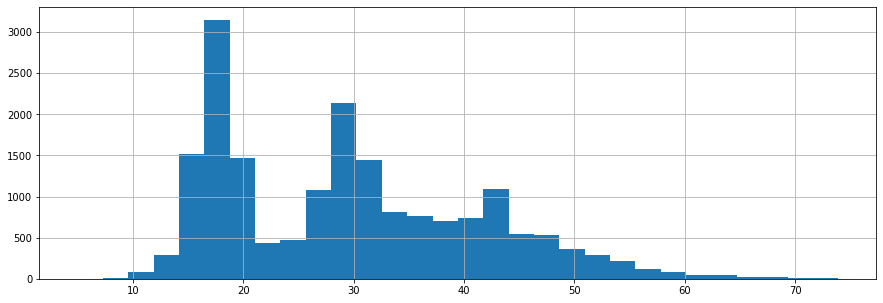

In [78]:
data['living_area'].hist(bins=30, figsize=(15,5));

***На графике видно, что больше всего квартир с жилой площадью - около 18, а также 30 кв м соответсвенно***

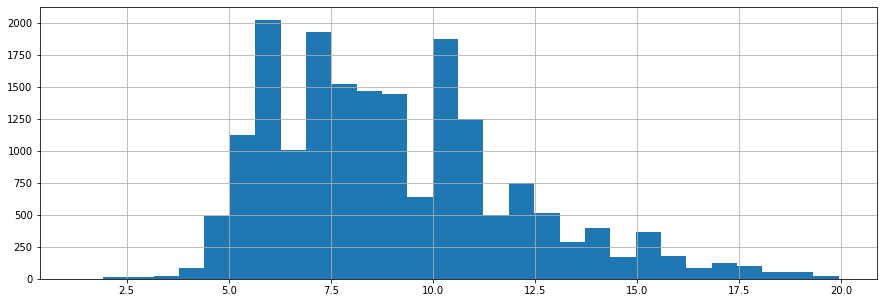

In [79]:
data['kitchen_area'].hist(bins=30, figsize=(15,5));

***На графике видно, что больше всего квартир с площадью кухни - около 6, 7.5, а также 10 кв м соответсвенно***

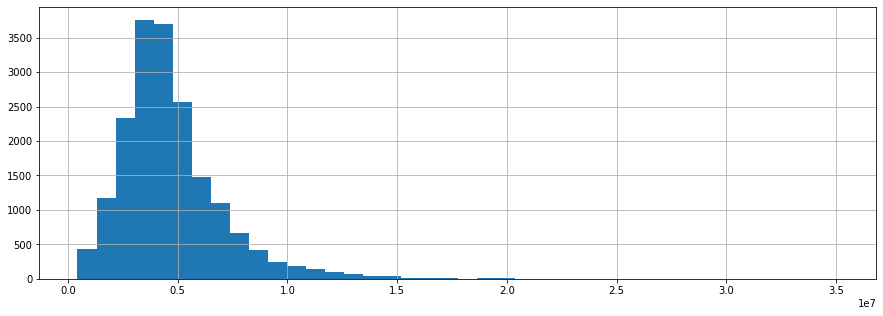

In [80]:
data['last_price'].hist(bins=40, figsize=(15,5));

***На графике видно, что больше всего квартир со стоимостью - около 0.4 le7***

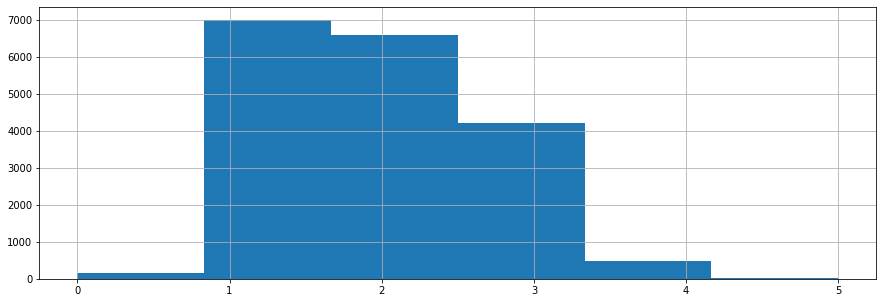

In [81]:
data['rooms'].hist(bins=6, figsize=(15,5));

***На графике видно, что больше всего квартир с количеством комнат - 1, 2, 3 соответственно***

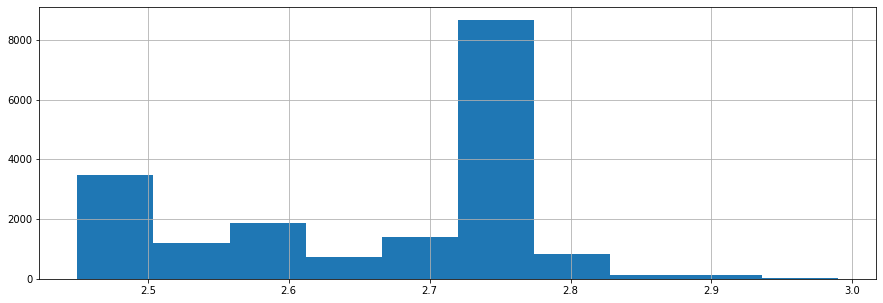

In [82]:
data['ceiling_height'].hist(bins=10, figsize=(15,5));

***На графике видно, что больше всего квартир с высотой потолков - 2,75***

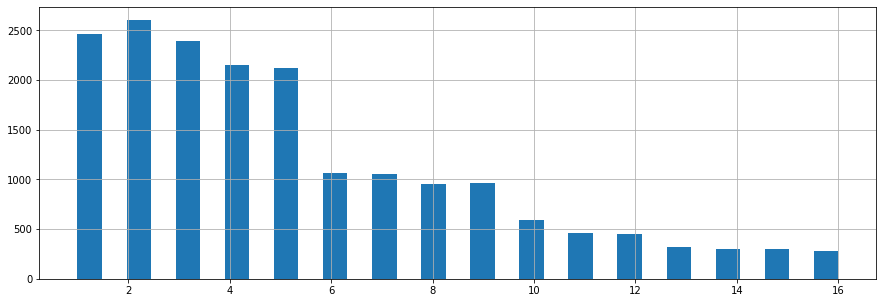

In [83]:
data['floor'].hist(bins=31, figsize=(15,5));

***На графике видно, что больше всего квартир в районе 1-5 этажей***

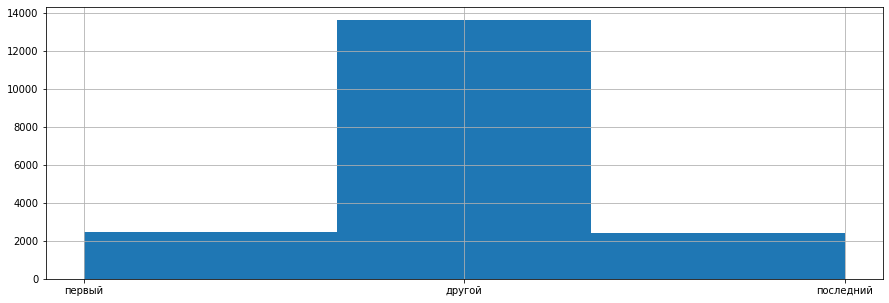

In [84]:
data['type_of_floor'].hist(bins=3, figsize=(15,5));

***На графике видно, что меньше всего квартир находятся на 1 и последнем этажах, больше всего - между ними***

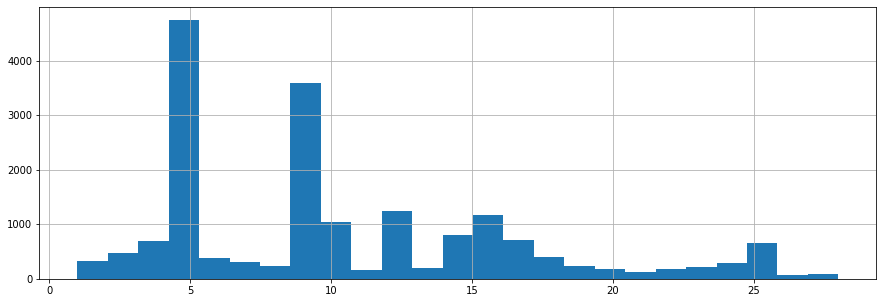

In [85]:
data['floors_total'].hist(bins=25, figsize=(15,5));

***На графике видно, что больше всего квартир продается в домах с количеством этажей - 5, 9, 12***

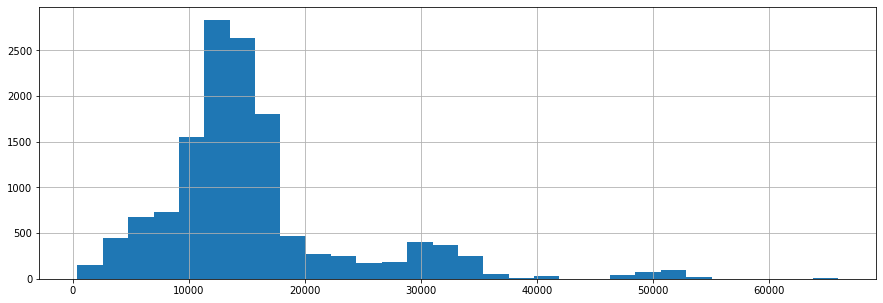

In [86]:
data['cityCenters_nearest'].hist(bins=30, figsize=(15,5));

***На графике видно, что больше всего квартир находятся на расстоянии 10000 - 18000 м от центра***

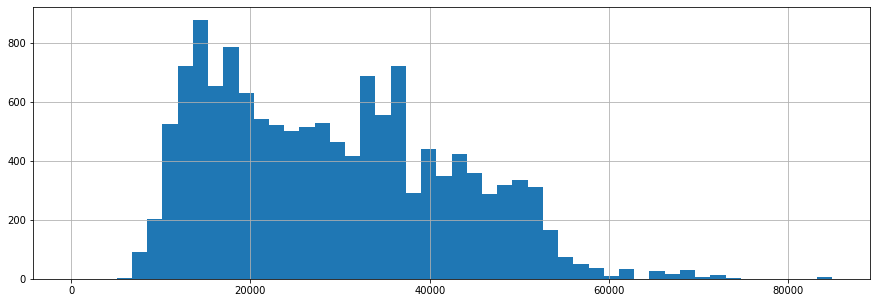

In [87]:
data['airports_nearest'].hist(bins=50, figsize=(15,5));

***На графике видно, что больше всего квартир находятся на расстоянии 13000, 33000 м от ближайшего аэропорта***

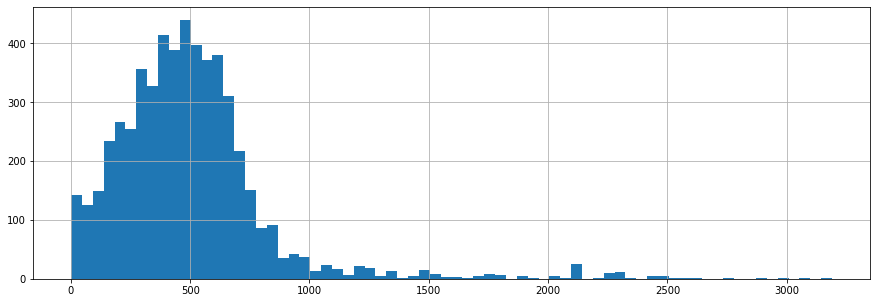

In [88]:
data['parks_nearest'].hist(bins=70, figsize=(15,5));

***На графике видно, что больше всего квартир находятся на расстоянии 300 - 600 м от ближайшего парка***

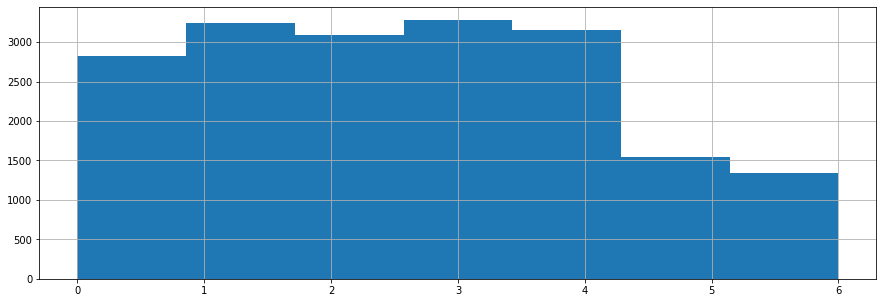

In [89]:
data['first_week_day_exposition'].hist(bins=7, figsize=(15,5));

***На графике видно, что чаще всего объявления размещаются с понедельника по пятницу, причем больше всего - в четверг***

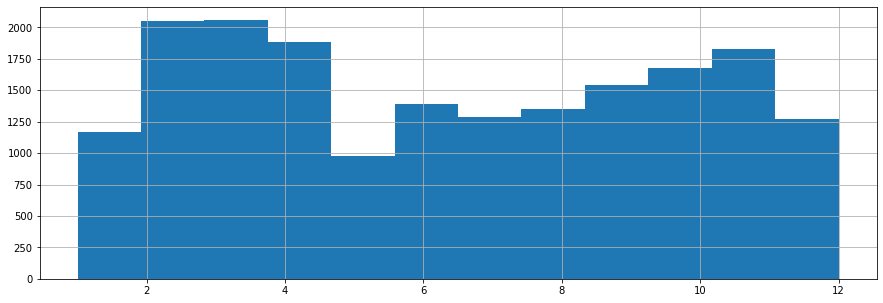

In [90]:
data['month_of_exposition'].hist(bins=12, figsize=(15,5));

***На графике видно, что чаще всего объявления размещаются в феврале, марте и сентябре-ноябре, причем больше всего - в марте***

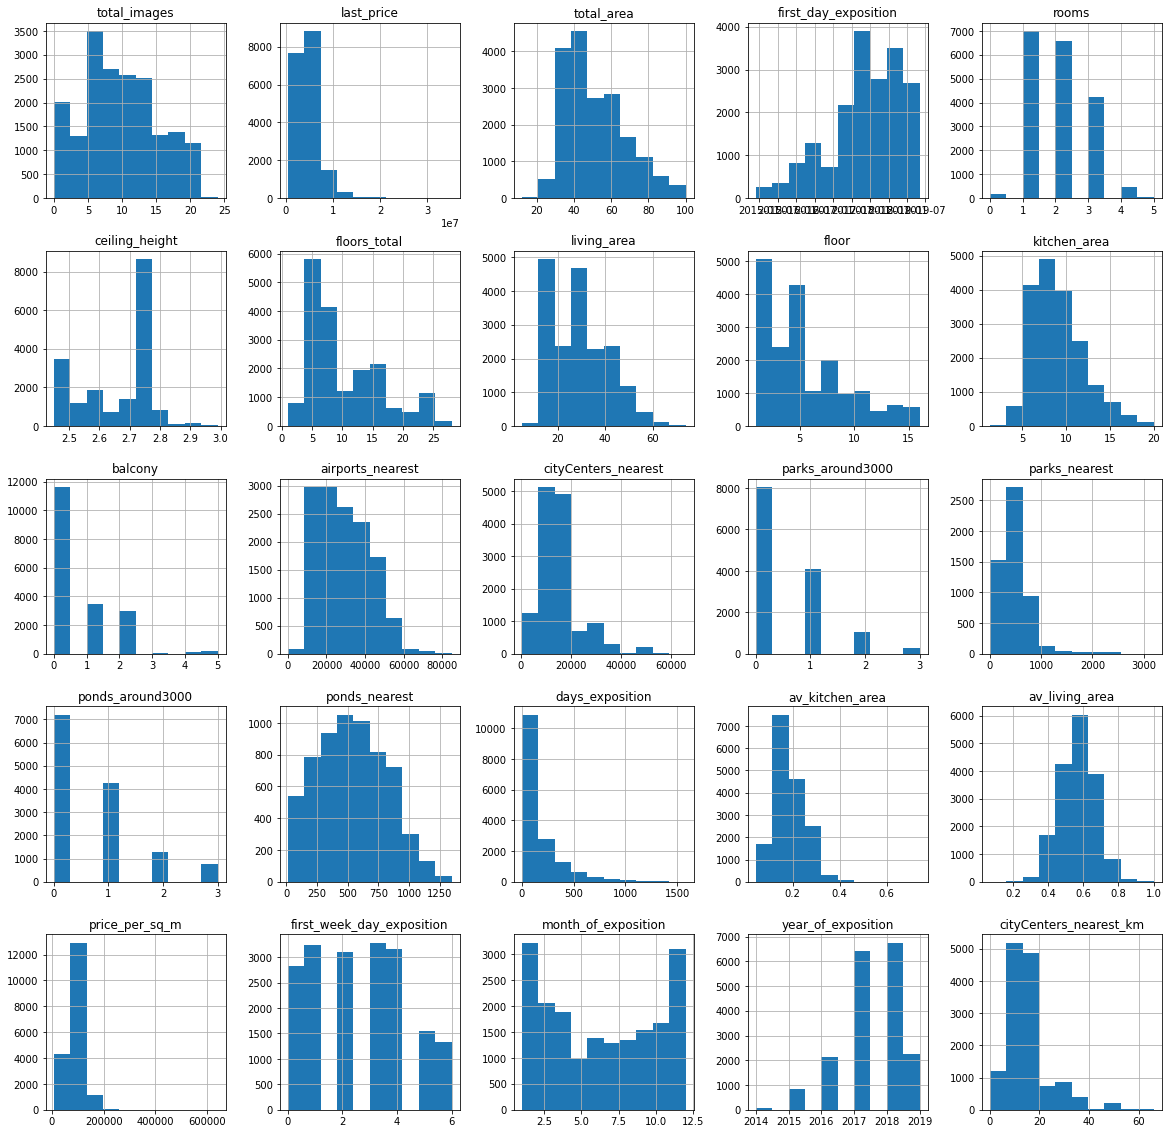

In [91]:
data.hist(figsize=(20,20));

***На графиках видно, что:***
1. в основном в обьявлении находится 5-15 фото
2. средняя total_area колеблется в районе 30-60
3. в основном в квартирах 1-3 комнаты
4. средняя высота потолков 2-3 метра
5. в среднем в домах 4-10 этажей
6. средняя жилая площадь - 20-40 кв м
7. в основном продают квартиры с 1-6 этажей
8. в среднем площадь кухни - 6-10 кв м
9. в основном в квартирах 0-2 балкона
10. в среднем аэропорты находятся на расстоянии 10000-40000 м от квартир
11. в среднем центр города находится на расстоянии 0-20000 м от квартир
12. в среднем рядом с домами либо нет парка, либо он 1
13. в среднем парк находится на расстоянии 0-1000 м от квартир
14. в среднем рядом с домами либо нет водоема, либо он 1
15. в среднем водоем находится на расстоянии 400-700 м от квартир
16. в среднем обьявление "висит" 0-200 дней
17. средняя площаль кухни колеблется в районе 0,1-0,2

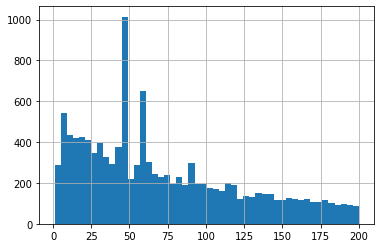

In [92]:
data['days_exposition'].hist(bins = 50, range=(1,200));

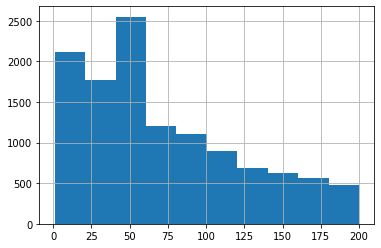

In [93]:
data['days_exposition'].hist(range=(1,200));

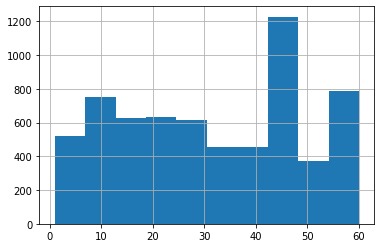

In [94]:
data['days_exposition'].hist(range=(1,60));

In [95]:
print(f'Среднее: {data["days_exposition"].mean()}')
print(f'Медиана: {data["days_exposition"].median()}')

Среднее: 168.14837797984762
Медиана: 89.00000000000001


***Проанализировав данные можно сказать, что в среднем продажа занимает около 50 дней.***
- Продажи можно считать быстрыми, если он длятся менее 40 дней
- Продажи можно считать необычно долгими, если они длятся больше 70 дней

In [96]:
print(f'Зависимость цены от общей площади: {data["last_price"].corr(data["total_area"])}')
print(f'Зависимость цены от жилой площади: {data["last_price"].corr(data["living_area"])}')
print(f'Зависимость цены от площади кухни: {data["last_price"].corr(data["kitchen_area"])}')

Зависимость цены от общей площади: 0.6586581920847462
Зависимость цены от жилой площади: 0.5338444634530904
Зависимость цены от площади кухни: 0.5051403287277909


In [97]:
print('Зависимость цены от типа количества комнат')
depend_floor_type_price = data.pivot_table(index='rooms', values= 'last_price',aggfunc=['count','mean'])
depend_floor_type_price.columns=['count', 'mean']
depend_floor_type_price.sort_values('mean', ascending=False)

Зависимость цены от типа количества комнат


,count,mean
rooms,,
5,22,6.463636e+06
3,4227,5.941478e+06
4,478,5.920017e+06
2,6597,4.874627e+06
1,7001,3.658849e+06
0,155,2.801082e+06


In [98]:
print('Зависимость цены от типа этажа')
depend_floor_type_price = data.pivot_table(index='type_of_floor', values= 'last_price',aggfunc=['count','mean'])
depend_floor_type_price.columns=['count', 'mean']
depend_floor_type_price.sort_values('mean', ascending=False)

Зависимость цены от типа этажа


,count,mean
type_of_floor,,
другой,13614,4.901880e+06
последний,2402,4.128203e+06
первый,2464,3.914020e+06


In [99]:
print('Зависимость цены от даты размещения (день недели)')
depend_day_price = data.pivot_table(index='first_week_day_exposition', values= 'last_price',aggfunc=['count','mean'])
depend_day_price.columns=['count', 'mean']
depend_day_price.sort_values('mean', ascending=False)

Зависимость цены от даты размещения (день недели)


,count,mean
first_week_day_exposition,,
2,3094,4.720701e+06
3,3282,4.683858e+06
0,2822,4.682894e+06
4,3153,4.666253e+06
1,3246,4.653457e+06
6,1342,4.627409e+06
5,1541,4.589929e+06


In [100]:
print('Зависимость цены от даты размещения (месяц)')
depend_month_price = data.pivot_table(index='month_of_exposition', values= 'last_price',aggfunc=['count','mean'])
depend_month_price.columns=['count', 'mean']
depend_month_price.sort_values('mean', ascending=False)

Зависимость цены от даты размещения (месяц)


,count,mean
month_of_exposition,,
4,1886,4.746024e+06
9,1542,4.742743e+06
11,1824,4.734119e+06
3,2059,4.703003e+06
2,2050,4.679429e+06
10,1676,4.663710e+06
1,1171,4.659034e+06
12,1269,4.636363e+06
8,1347,4.634573e+06


In [101]:
print('Зависимость цены от даты размещения (год)')
depend_year_price = data.pivot_table(index='year_of_exposition', values= 'last_price',aggfunc=['count','mean'])
depend_year_price.columns=['count', 'mean']
depend_year_price.sort_values('mean', ascending=False)

Зависимость цены от даты размещения (год)


,count,mean
year_of_exposition,,
2014,68,5.759266e+06
2015,837,5.078920e+06
2019,2273,4.986161e+06
2018,6750,4.622554e+06
2016,2139,4.597275e+06
2017,6413,4.566075e+06


<AxesSubplot:title={'center':'Зависимость цены от общей площади'}, xlabel='total_area', ylabel='last_price'>

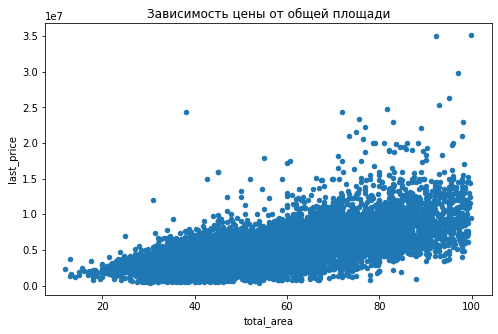

In [102]:
data.plot(x='total_area', y='last_price', kind='scatter', figsize=(8,5), title='Зависимость цены от общей площади')

<AxesSubplot:title={'center':'Зависимость цены от жилой площади'}, xlabel='living_area', ylabel='last_price'>

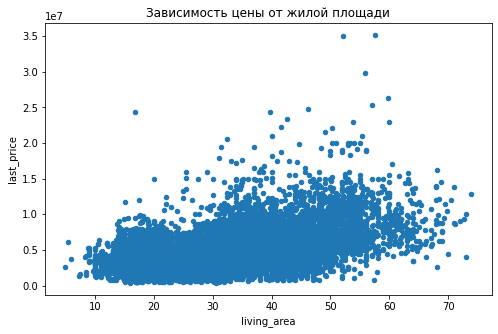

In [103]:
data.plot(x='living_area', y='last_price', kind='scatter', figsize=(8,5), title='Зависимость цены от жилой площади')

<AxesSubplot:title={'center':'Зависимость цены от площади кухни'}, xlabel='kitchen_area', ylabel='last_price'>

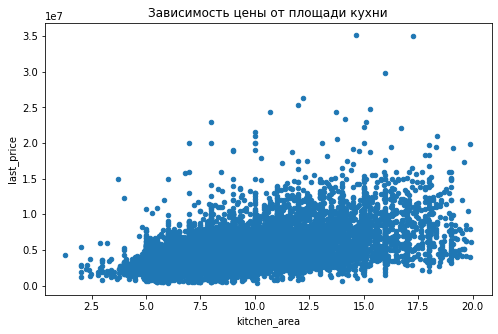

In [104]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', figsize=(8,5), title='Зависимость цены от площади кухни')

<AxesSubplot:title={'center':'Зависимость цены от типа этажа'}, xlabel='type_of_floor'>

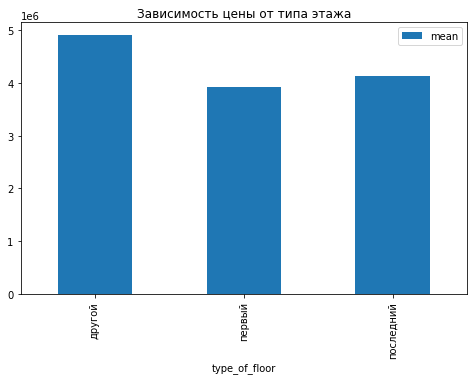

In [105]:
depend_floor_type_price.plot(y='mean', kind='bar', figsize=(8,5), title='Зависимость цены от типа этажа')

<AxesSubplot:title={'center':'Зависимость цены от дня размещения объявления'}, xlabel='first_week_day_exposition'>

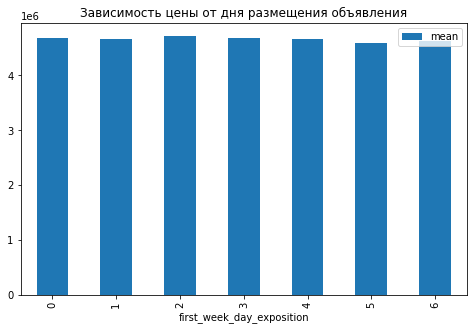

In [106]:
depend_day_price.plot(y='mean', kind='bar', figsize=(8,5), title='Зависимость цены от дня размещения объявления')

<AxesSubplot:title={'center':'Зависимость цены от месяца размещения объявления'}, xlabel='month_of_exposition'>

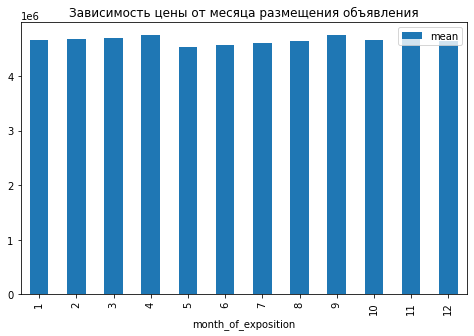

In [107]:
depend_month_price.plot(y='mean', kind='bar', figsize=(8,5), title='Зависимость цены от месяца размещения объявления')

<AxesSubplot:title={'center':'Зависимость цены от года размещения объявления'}, xlabel='year_of_exposition'>

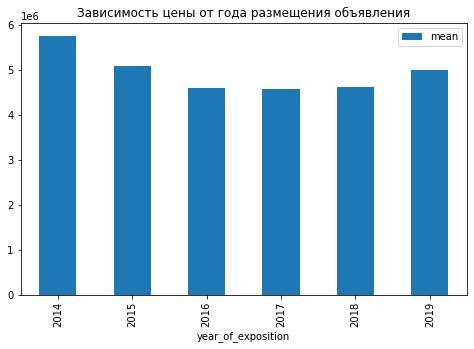

In [108]:
depend_year_price.plot(y='mean', kind='bar', figsize=(8,5), title='Зависимость цены от года размещения объявления')

***Вывод:*** 
1. Зависимость цены от общей площади, жилой площади, а также от площади кухни прямая, то есть чем больше площади, тем выше цена
2. Квартиры на первом этаже стоят меньше, чем на других
3. День и месяц, когда было опубликовано объявление не влияет на цену квартиры
4. Чем "старше" объявление, тем оно дороже (2014, 2015 гг)

In [109]:
#Находим топ-10 городов с наибольшим числом объявлений и среднюю стоимость квадратного метра в данных начеленных пунктах
top_cities = data.pivot_table(index='locality_name', values='price_per_sq_m', aggfunc=['count', 'mean'])
top_cities.columns = ['count', 'mean']
top_cities = top_cities.sort_values('count', ascending=False).head(10)
top_cities

,count,mean
locality_name,,
Санкт-Петербург,11449,106076.797121
Мурино,466,85549.400524
Шушары,378,78058.390796
Всеволожск,374,68120.743968
Кудрово,374,95691.540606
Колпино,310,75398.773205
Пушкин,297,100265.351616
Гатчина,281,68582.554521
Парголово,225,88575.855226


In [110]:
print(f'Населённый пункт с самой высокой стоимостью квадратного метра: {top_cities[top_cities["mean"] == top_cities["mean"].max()].index[0]}')
print(f'Населённый пункт с самой низкой стоимостью квадратного метра: {top_cities[top_cities["mean"] == top_cities["mean"].min()].index[0]}')

Населённый пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург
Населённый пункт с самой низкой стоимостью квадратного метра: Выборг


In [111]:
distance_price = data.query('locality_name == "Санкт-Петербург"').groupby('cityCenters_nearest_km')['last_price'].\
mean().sort_values(ascending=False)

In [112]:
distance_price

cityCenters_nearest_km
1.0     8.910123e+06
5.0     8.360974e+06
2.0     8.224307e+06
4.0     7.590372e+06
6.0     7.452396e+06
7.0     7.264203e+06
3.0     7.126533e+06
8.0     6.558064e+06
0.0     6.466667e+06
13.0    5.485116e+06
10.0    5.348006e+06
9.0     5.333368e+06
11.0    5.297121e+06
12.0    5.290625e+06
14.0    5.155444e+06
15.0    5.142948e+06
21.0    5.140496e+06
22.0    5.000012e+06
16.0    4.972966e+06
17.0    4.813075e+06
19.0    4.743480e+06
20.0    4.722941e+06
23.0    4.698295e+06
28.0    4.597500e+06
18.0    4.582959e+06
29.0    4.092500e+06
25.0    4.076255e+06
26.0    3.920472e+06
24.0    3.667556e+06
27.0    2.250000e+06
Name: last_price, dtype: float64

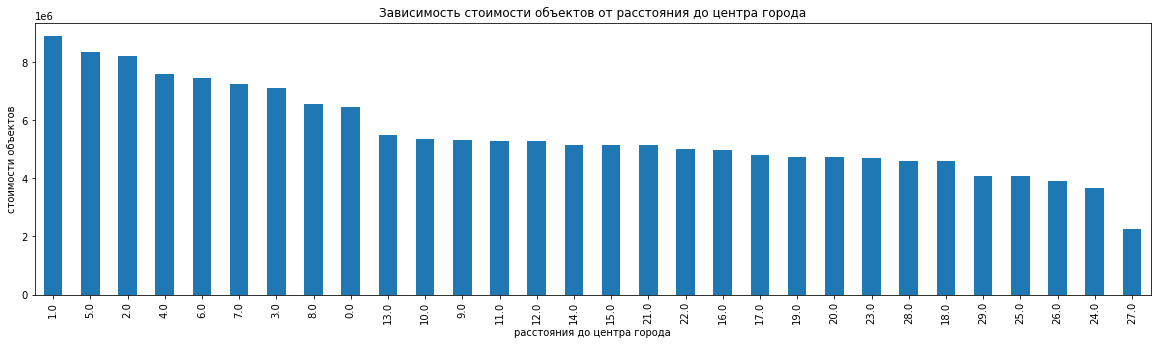

In [113]:
distance_price.plot(y='cityCenters_nearest_km',kind='bar', figsize=(20,5));
plt.title('Зависимость стоимости объектов от расстояния до центра города');
plt.xlabel('расстояния до центра города');
plt.ylabel('стоимости объектов');

***Вывод:***
<br>Из анализа видно, что чем ближе квартира находится к центру Санкт-Петербурга, тем выше ее стоимость

### Общий вывод

**Данный проект был нацелен на анализ рынка недвижимости в Санкт-Петербурге и соседних населенных пунктах.**

<br>***В ходе работы над проектом:***
1. Проанализированы общие сведения о датафрейме
2. Обработаны пропущенные значения в столбцах
3. Изменены типы данных некоторых столбцов
4. Обработаны неявные дубликаты в названиях населенных пунктах
5. Обработаны или устранены редкие и выбивающиеся значения
6. Добавлены новые столбцы, а именно: цена одного квадратного метра; день недели публикации объявления; месяц публикации объявления; год публикации объявления; тип этажа квартиры; расстояние до центра города в километрах
7. Изучены следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления
8. Изучены, как быстро продавались квартиры
9. Проанализировано, зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год)
10. Рассчитана средняя цена квадратного метра в 10 населенных пунктах с наибольшим количеством объявлений и выделены населенные пункты с самой высокой и самой низкой стоимостью квадратного метра
11. Выделены квартиры в Санкт-Петербурге и рассчитана зависимость стоимости недвижимости от расстояния до центра города.

<br>***Из проведенного анализа можно сделать следующие выводы:***
1. Зависимость цены от общей площади, жилой площади, а также от площади кухни прямая, то есть чем больше площади, тем выше цена
2. Квартиры на первом этаже стоят меньше, чем на других
3. День и месяц, когда было опубликовано объявление не влияет на цену квартиры
4. Чем "старше" объявления, тем квартиры дороже
5. Населённый пункт с самой высокой стоимостью квадратного метра: Санкт-Петербург
6. Населённый пункт с самой низкой стоимостью квадратного метра: Гатчина
7. Чем ближе квартира к центру Санкт-Петербурга, тем ее стоимость выше
8. В среднем продажа занимает около 170 дней